# HeatMap

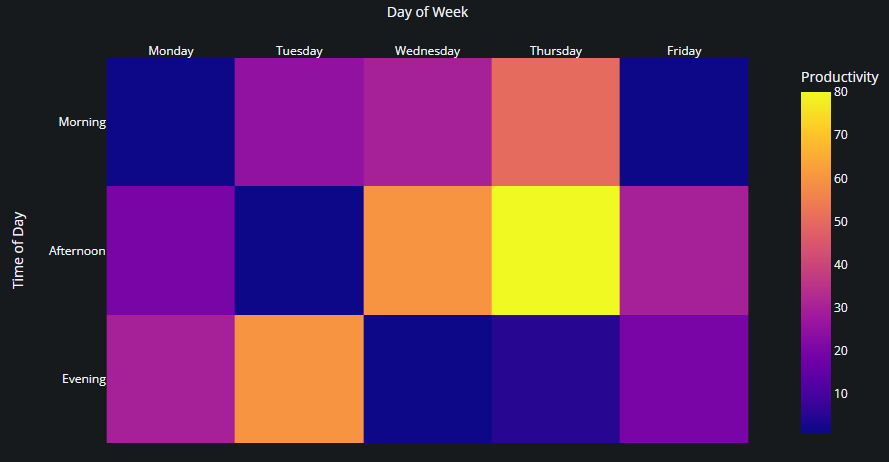

In [1]:
# Import Libs Will Be Used
import pandas as pd
import plotly.express as px

#load Data Frame From internet
df = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Plotly_Graphs/Heatmaps/Historical%20NBA%20Performance.csv')

In [36]:
df.head()

,Year,Team,Record,Winning Percentage
0,2016,Celtics,25-15,0.625
1,2015,Celtics,48-34,0.585
2,2014,Celtics,40-42,0.488
3,2013,Celtics,25-57,0.305
4,2012,Celtics,41-40,0.506


In [5]:
# Create Pivot Table 
pv1 = df.pivot('Team','Year','Winning Percentage')#[0:5]  # pivot( Y , X , Values)

# Show It
print(pv1)

Year            1946   1947   1948   1949   1950   1951   1952   1953   1954  \
Team                                                                           
76ers            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Blackhawks       NaN    NaN    NaN  0.453  0.368    NaN    NaN    NaN    NaN   
Bobcats          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Braves           NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Bucks            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Bullets          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Bulls            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Cavaliers        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Celtics        0.367  0.417  0.417  0.324  0.565  0.591  0.648  0.583  0.500   
Clippers         NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
Grizzlies        NaN    NaN    NaN    Na

In [6]:
# Making The HeatMap
px.imshow( pv1 )

In [7]:
# Create Sub Pivot Table Just For Specific Teams
pv2 = pv1[pv1.index.isin(['Warriors', 'Knicks', 'Celtics', 'Pistons', 'celtics'])]

# Show It
print(pv2)

Year       1946   1947   1948   1949   1950   1951   1952   1953   1954  \
Team                                                                      
Celtics   0.367  0.417  0.417  0.324  0.565  0.591  0.648  0.583  0.500   
Knicks    0.550  0.542  0.533  0.588  0.545  0.561  0.671  0.611  0.528   
Pistons     NaN    NaN  0.367  0.588  0.471  0.439  0.522  0.556  0.597   
Warriors  0.583  0.563  0.467  0.382  0.606  0.500  0.174  0.403  0.458   

Year       1955  ...   2007   2008   2009   2010   2011   2012   2013   2014  \
Team             ...                                                           
Celtics   0.542  ...  0.805  0.756  0.610  0.683  0.591  0.506  0.305  0.488   
Knicks    0.486  ...  0.280  0.390  0.354  0.512  0.545  0.659  0.451  0.207   
Pistons   0.514  ...  0.720  0.476  0.329  0.366  0.379  0.354  0.354  0.390   
Warriors  0.625  ...  0.585  0.354  0.317  0.439  0.348  0.573  0.622  0.817   

Year       2015   2016  
Team                    
Celtics   0.585  0

In [10]:
# Making The HeatMap Just For The 5 Teams
px.imshow( pv2 ,
          
          color_continuous_scale = px.colors.diverging.Portland,
          range_color =[0,2]
         
         )

## -------------- -------------- -------------- -------------- -------------- -------------- -------------- -------------- --------------


In [11]:
# Loading Another Data Frame For Berlin_crimes

bc = pd.read_csv('https://raw.githubusercontent.com/Coding-with-Adam/Dash-by-Plotly/master/Plotly_Graphs/Heatmaps/Berlin_crimes.csv')

In [11]:
bc.head()

,Year,District,Code,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car,From_car,Bike,Burglary,Fire,Arson,Damage,Graffiti,Drugs,Local
0,2012,Mitte,10111,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,10112,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,10113,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,10114,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,10221,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [16]:
Crime_Sum = bc.groupby(['District','Year'], as_index = False)[['Robbery','Theft','Drugs']].sum()

In [17]:
Crime_Sum

,District,Year,Robbery,Theft,Drugs
0,Charlottenburg-Wilmersdorf,2012,643,24061,1064
1,Charlottenburg-Wilmersdorf,2013,639,25733,1180
2,Charlottenburg-Wilmersdorf,2014,641,26829,1208
3,Charlottenburg-Wilmersdorf,2015,536,30622,885
4,Charlottenburg-Wilmersdorf,2016,523,28893,948
...,...,...,...,...,...
91,Treptow-Köpenick,2015,197,11706,517
92,Treptow-Köpenick,2016,146,12524,371
93,Treptow-Köpenick,2017,200,11453,495
94,Treptow-Köpenick,2018,216,11145,574


In [19]:
# Make A Coloumn For Sum Some Value
Crime_Sum['sum'] = Crime_Sum ['Robbery']+Crime_Sum['Theft']+Crime_Sum['Drugs']

# Show It
Crime_Sum

,District,Year,Robbery,Theft,Drugs,sum
0,Charlottenburg-Wilmersdorf,2012,643,24061,1064,25768
1,Charlottenburg-Wilmersdorf,2013,639,25733,1180,27552
2,Charlottenburg-Wilmersdorf,2014,641,26829,1208,28678
3,Charlottenburg-Wilmersdorf,2015,536,30622,885,32043
4,Charlottenburg-Wilmersdorf,2016,523,28893,948,30364
...,...,...,...,...,...,...
91,Treptow-Köpenick,2015,197,11706,517,12420
92,Treptow-Köpenick,2016,146,12524,371,13041
93,Treptow-Köpenick,2017,200,11453,495,12148
94,Treptow-Köpenick,2018,216,11145,574,11935


In [30]:
Crime_Sum.District.unique()

array(['Charlottenburg-Wilmersdorf', 'Friedrichshain-Kreuzberg',
       'Lichtenberg'], dtype=object)

In [21]:
Crime_Sum

,District,Year,Robbery,Theft,Drugs,sum
0,Charlottenburg-Wilmersdorf,2012,643,24061,1064,25768
1,Charlottenburg-Wilmersdorf,2013,639,25733,1180,27552
2,Charlottenburg-Wilmersdorf,2014,641,26829,1208,28678
3,Charlottenburg-Wilmersdorf,2015,536,30622,885,32043
4,Charlottenburg-Wilmersdorf,2016,523,28893,948,30364
...,...,...,...,...,...,...
91,Treptow-Köpenick,2015,197,11706,517,12420
92,Treptow-Köpenick,2016,146,12524,371,13041
93,Treptow-Köpenick,2017,200,11453,495,12148
94,Treptow-Köpenick,2018,216,11145,574,11935


In [23]:
# Make PV FOr It 

pv3 = Crime_Sum.pivot('District','Year','sum')

In [25]:
# Show It

px.imshow(pv3,
          color_continuous_scale = px.colors.sequential.Reds
         )

## -------- -------- -------- -------- -------- -------- -------- -------- -------- -------- -------- -------- -------- -------- -------- 

## Creating Heatmap Using List In Case You Can't Make Pivot Table From Your Data

In [27]:
Crime_Sum

,District,Year,Robbery,Theft,Drugs,sum
0,Charlottenburg-Wilmersdorf,2012,643,24061,1064,25768
1,Charlottenburg-Wilmersdorf,2013,639,25733,1180,27552
2,Charlottenburg-Wilmersdorf,2014,641,26829,1208,28678
3,Charlottenburg-Wilmersdorf,2015,536,30622,885,32043
4,Charlottenburg-Wilmersdorf,2016,523,28893,948,30364
...,...,...,...,...,...,...
91,Treptow-Köpenick,2015,197,11706,517,12420
92,Treptow-Köpenick,2016,146,12524,371,13041
93,Treptow-Köpenick,2017,200,11453,495,12148
94,Treptow-Köpenick,2018,216,11145,574,11935


In [29]:
# Create Our Columns List
our_list1 = Crime_Sum[['Robbery','Theft','Drugs']].values.tolist()


# Show In
our_list1

[[643, 24061, 1064],
 [639, 25733, 1180],
 [641, 26829, 1208],
 [536, 30622, 885],
 [523, 28893, 948],
 [401, 25950, 942],
 [417, 25374, 1024],
 [420, 22571, 1174],
 [868, 22050, 1853],
 [906, 24474, 2391],
 [940, 28793, 3039],
 [1027, 32845, 5571],
 [947, 29984, 4431],
 [608, 25208, 4541],
 [632, 24384, 4625],
 [820, 25650, 5232],
 [260, 11911, 335],
 [282, 12074, 409],
 [236, 12407, 378],
 [212, 12785, 387],
 [237, 14126, 429],
 [218, 12488, 515],
 [185, 11974, 543],
 [260, 11637, 534],
 [331, 9714, 308],
 [327, 9830, 324],
 [260, 9507, 344],
 [222, 9624, 367],
 [235, 10364, 357],
 [199, 9941, 357],
 [168, 8456, 485],
 [239, 8605, 544],
 [1253, 36486, 2849],
 [1096, 39314, 2864],
 [1014, 41934, 2880],
 [1040, 46613, 2638],
 [976, 48785, 3350],
 [763, 41915, 3839],
 [733, 37802, 3792],
 [707, 35601, 4233],
 [767, 19121, 1578],
 [752, 19538, 1635],
 [580, 19689, 1180],
 [582, 21690, 1683],
 [513, 22311, 1107],
 [480, 20420, 1311],
 [505, 19562, 1633],
 [480, 19291, 2126],
 [410, 20310,

In [33]:
# Creating The Heatmap

px.imshow(our_list1,
         
         x = ['Robbery','Theft','Drugs'],
          
         y = Crime_Sum['District'],
                    
          labels = dict(x="Crime Type", y="District", color="Crime Number"),
          
          
          
          
         ) 